In [ ]:
#!pip install -U scikit-learn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df=pd.read_csv(r"C:\Users\vaibhav kumar\Downloads\Data Science intern\Boston_Train_Test.csv", encoding= 'unicode_escape')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


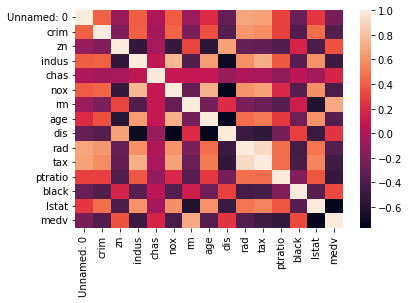

In [7]:
sns.heatmap(df.corr())
plt.show()

In [8]:
# X y Split

X = df.drop("medv", axis = 1)
y = df["medv"]

In [11]:
# Test Train Splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36
43,43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44
284,284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85
396,396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37
188,188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2,382.84,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82
18,18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69
430,430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64
101,101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67


In [12]:
y_train

347    23.1
43     24.7
284    32.2
396    12.5
188    29.8
       ... 
142    13.4
18     20.2
430    14.5
101    26.5
40     34.9
Name: medv, Length: 354, dtype: float64

In [13]:
# Splliting of Train data  is done randomly to avoid potential selection biases arising. This is beneficial for obtaining 
# non-biased resuts, it also means that results can differ from run to run.

X_test

# Splliting of Test data  is done randomly to avoid potential selection biases arising. This is beneficial for obtaining 
# non-biased resuts, it also means that results can differ from run to run.

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
355,355,0.10659,80.0,1.91,0,0.4130,5.936,19.5,10.5857,4,334,22.0,376.04,5.57
89,89,0.05302,0.0,3.41,0,0.4890,7.079,63.1,3.4145,2,270,17.8,396.06,5.70
149,149,2.73397,0.0,19.58,0,0.8710,5.597,94.9,1.5257,5,403,14.7,351.85,21.45
138,138,0.24980,0.0,21.89,0,0.6240,5.857,98.2,1.6686,4,437,21.2,392.04,21.32
493,493,0.17331,0.0,9.69,0,0.5850,5.707,54.0,2.3817,6,391,19.2,396.90,12.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,381,15.87440,0.0,18.10,0,0.6710,6.545,99.1,1.5192,24,666,20.2,396.90,21.08
64,64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
326,326,0.30347,0.0,7.38,0,0.4930,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
25,25,0.84054,0.0,8.14,0,0.5380,5.599,85.7,4.4546,4,307,21.0,303.42,16.51


In [14]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train.shape

(354, 14)

In [16]:
X_train

array([[6.91235060e-01, 1.39148215e-04, 8.50000000e-01, ...,
        5.63829787e-01, 9.88728630e-01, 1.31347518e-01],
       [8.56573705e-02, 1.72013270e-03, 0.00000000e+00, ...,
        5.63829787e-01, 9.93847395e-01, 1.61985816e-01],
       [5.65737052e-01, 3.07969394e-05, 9.00000000e-01, ...,
        2.87234043e-01, 9.94503001e-01, 1.73617021e-01],
       ...,
       [8.56573705e-01, 9.53784584e-02, 0.00000000e+00, ...,
        8.08510638e-01, 2.09617227e-01, 4.51347518e-01],
       [2.01195219e-01, 1.21389396e-03, 0.00000000e+00, ...,
        8.82978723e-01, 9.96671542e-01, 1.68510638e-01],
       [7.96812749e-02, 3.06508225e-04, 7.50000000e-01, ...,
        6.06382979e-01, 9.96772404e-01, 7.09219858e-03]])

In [17]:
X_test

array([[7.07171315e-01, 1.12701062e-03, 8.00000000e-01, ...,
        1.00000000e+00, 9.47400272e-01, 1.08936170e-01],
       [1.77290837e-01, 5.24896740e-04, 0.00000000e+00, ...,
        5.53191489e-01, 9.97881890e-01, 1.12624113e-01],
       [2.96812749e-01, 3.06581283e-02, 0.00000000e+00, ...,
        2.23404255e-01, 8.86403752e-01, 5.59432624e-01],
       ...,
       [6.49402390e-01, 3.33989436e-03, 0.00000000e+00, ...,
        7.44680851e-01, 1.00000000e+00, 1.25390071e-01],
       [4.98007968e-02, 9.37643166e-03, 0.00000000e+00, ...,
        8.93617021e-01, 7.64284634e-01, 4.19290780e-01],
       [8.72509960e-01, 1.53667511e-01, 0.00000000e+00, ...,
        8.08510638e-01, 1.73054617e-01, 9.16028369e-01]])

In [18]:
X_test.shape

(152, 14)

In [19]:
# Linear Regression

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

X = df["nox"]
y = df["dis"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [20]:
#X_train

model = reg.fit(X_train, y_train)

In [21]:
model.coef_

array([-13.66953623])

In [22]:
model.intercept_

11.38811092875417

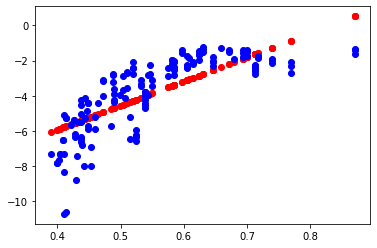

In [23]:
y_pred = model.predict(X_test)

plt.scatter(X_test, -y_pred, c = "r")
plt.scatter(X_test, -y_test, c = "b")
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mean_absolute_error(y_test, y_pred)

mean_squared_error(y_test, y_pred)

np.sqrt(mean_squared_error(y_test, y_pred))

p=r2_score(y_test, y_pred)

p

0.602270535775822

In [25]:
#  Multiple Linear Regression

X = df.drop("medv", axis = 1)
y = df["medv"]

X

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [27]:
model.coef_

array([-7.60758272e-04, -1.33440243e-01,  5.76329038e-02,  3.54041723e-02,
        1.69281625e+00, -1.86212072e+01,  3.56460749e+00, -1.74212324e-03,
       -1.58644494e+00,  3.26202485e-01, -1.27117387e-02, -9.64352356e-01,
        8.58633637e-03, -5.37874887e-01])

In [28]:
model.intercept_

39.62322051209671

In [29]:
y_pred  = model.predict(X_test)

In [30]:
mean_absolute_error(y_test, y_pred)

2.9495942985662755

In [31]:
mean_squared_error(y_test, y_pred)

17.836167010161777

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.223288648690944

In [33]:
r2_score(y_test, y_pred)

0.753625070837884

In [34]:
# Polynomial Regression

X = df["nox"]
y = df["dis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

p_test = X_test

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

poly.fit(X_train)

PolynomialFeatures()

In [36]:
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)

In [37]:
#X_test

reg = LinearRegression()

In [38]:
model = reg.fit(X_train, y_train)

In [39]:
model.coef_

array([  0.        , -78.3974175 ,  54.16924065])

In [40]:
model.intercept_

29.901407805357177

In [41]:
y_pred = model.predict(X_test)

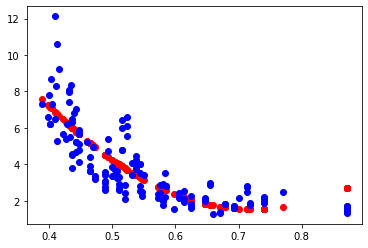

In [42]:
plt.scatter(X_test[:, 1], y_pred, c = "r")
plt.scatter(X_test[:, 1], y_test, c = "b")
plt.show()

In [43]:
mean_absolute_error(y_test, y_pred)

0.8637757396968181

In [44]:
mean_squared_error(y_test, y_pred)

1.304792982675923

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.1422753532646683

In [46]:
r2_score(y_test, y_pred)

0.7006383365217164

In [47]:
# Observations

# In case of Multiple Liner Regression the r2 value comes near to 0.754 that 
# means 75% data is reliable so house prediction(Medv) in Boston.
# It is nearly a Good data but not perfect.

# THANK YOU